# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('demo01.csv')

In [2]:
# Avaliando as variáveis e seus tipos de dados
print("Tipos de dados de cada variável:")
print(df.dtypes)

Tipos de dados de cada variável:
sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object


In [3]:
# Verificando a quantidade de valores ausentes (missings)
print("\nQuantidade de valores ausentes por coluna:")
print(df.isnull().sum())


Quantidade de valores ausentes por coluna:
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


In [4]:
# Analisando a distribuição da variável resposta 'mau'
print("\nDistribuição da variável 'mau':")
print(df['mau'].value_counts(normalize=True) * 100)


Distribuição da variável 'mau':
mau
False    97.657658
True      2.342342
Name: proportion, dtype: float64


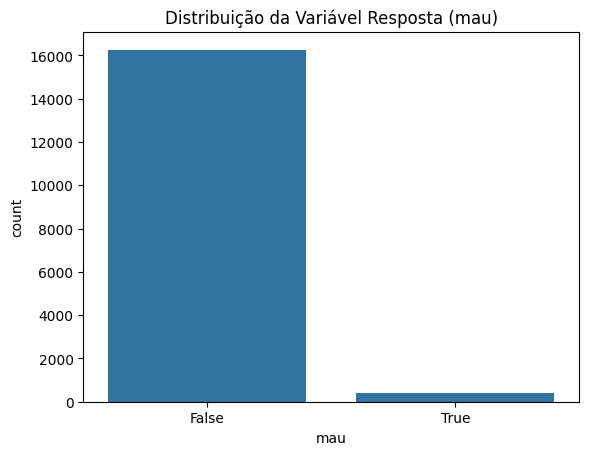

In [5]:
# Exibindo a distribuição de forma gráfica
sns.countplot(x='mau', data=df)
plt.title("Distribuição da Variável Resposta (mau)")
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [6]:
# Iniciar um DataFrame para armazenar os dados
dados = pd.DataFrame({
    'variavel': df.columns,     # Nomes das variáveis
    'tipo_dado': df.dtypes      # Tipos de dados das variáveis
})

# Iniciar uma lista vazia para armazenar a quantidade de categorias
qtd_categorias = []

# Iterar sobre as variáveis para contar o número de categorias únicas
for coluna in df.columns:
    qtd_categorias.append(df[coluna].nunique())  # Contar o número de categorias e acumular na lista

# Adicionar a coluna 'qtd_categorias' ao DataFrame de dados
dados['qtd_categorias'] = qtd_categorias

# Exibir o DataFrame de metadados
print(dados)

                                    variavel tipo_dado  qtd_categorias
sexo                                    sexo    object               2
posse_de_veiculo            posse_de_veiculo    object               2
posse_de_imovel              posse_de_imovel    object               2
qtd_filhos                        qtd_filhos     int64               8
tipo_renda                        tipo_renda    object               5
educacao                            educacao    object               5
estado_civil                    estado_civil    object               5
tipo_residencia              tipo_residencia    object               6
idade                                  idade   float64            5298
tempo_emprego                  tempo_emprego   float64            3005
possui_celular                possui_celular     int64               1
possui_fone_comercial  possui_fone_comercial     int64               2
possui_fone                      possui_fone     int64               2
possui

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [7]:
dados = df.copy()

# Filtrando variáveis qualitativas que não são {0, 1} ou {True, False}
for coluna in dados.select_dtypes(include=['object']).columns:
    # Criando as variáveis dummy para cada variável qualitativa
    dummies = pd.get_dummies(dados[coluna], prefix=coluna, drop_first=True)

    # Adicionando as variáveis dummy ao DataFrame original
    dados = pd.concat([dados, dummies], axis=1)

    # Removendo a coluna original qualitativa
    dados.drop(columns=[coluna], inplace=True)

# Excluindo quaisquer variáveis str que possam ter sido deixadas sem a versão dummy
dados = dados.select_dtypes(exclude=['object'])

# Exibindo as primeiras linhas do DataFrame final
print(dados.head())

   qtd_filhos      idade  tempo_emprego  possui_celular  \
0           0  58.832877       3.106849               1   
1           0  52.356164       8.358904               1   
2           0  52.356164       8.358904               1   
3           0  46.224658       2.106849               1   
4           0  29.230137       3.021918               1   

   possui_fone_comercial  possui_fone  possui_email  qt_pessoas_residencia  \
0                      0            0             0                    2.0   
1                      0            1             1                    1.0   
2                      0            1             1                    1.0   
3                      1            1             1                    2.0   
4                      0            0             0                    2.0   

     mau  sexo_M  ...  educacao_Secondary / secondary special  \
0  False    True  ...                                    True   
1  False   False  ...                         

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [8]:
# Tabela cruzada entre 'possui_email' e 'mau'
tabela_email = pd.crosstab(df['possui_email'], df['mau'], normalize='index')
print("Tabela cruzada entre 'possui_email' e 'mau':")
print(tabela_email)

Tabela cruzada entre 'possui_email' e 'mau':
mau              False     True 
possui_email                    
0             0.976269  0.023731
1             0.979730  0.020270


In [9]:
# Tabela cruzada entre 'posse_de_veiculo' e 'mau'
tabela_veiculo = pd.crosstab(df['posse_de_veiculo'], df['mau'], normalize='index')
print("\nTabela cruzada entre 'posse_de_veiculo' e 'mau':")
print(tabela_veiculo)


Tabela cruzada entre 'posse_de_veiculo' e 'mau':
mau                  False     True 
posse_de_veiculo                    
N                 0.975732  0.024268
Y                 0.977905  0.022095


In [11]:
# Identificando a coluna relacionada a 'mau = 1'
coluna_mau = tabela_email.columns[-1]

print(f"\nProbabilidade de 'mau = {coluna_mau}' para 'possui_email':")
print(tabela_email[coluna_mau])

print(f"\nProbabilidade de 'mau = {coluna_mau}' para 'posse_de_veiculo':")
print(tabela_veiculo[coluna_mau])


Probabilidade de 'mau = True' para 'possui_email':
possui_email
0    0.023731
1    0.020270
Name: True, dtype: float64

Probabilidade de 'mau = True' para 'posse_de_veiculo':
posse_de_veiculo
N    0.024268
Y    0.022095
Name: True, dtype: float64


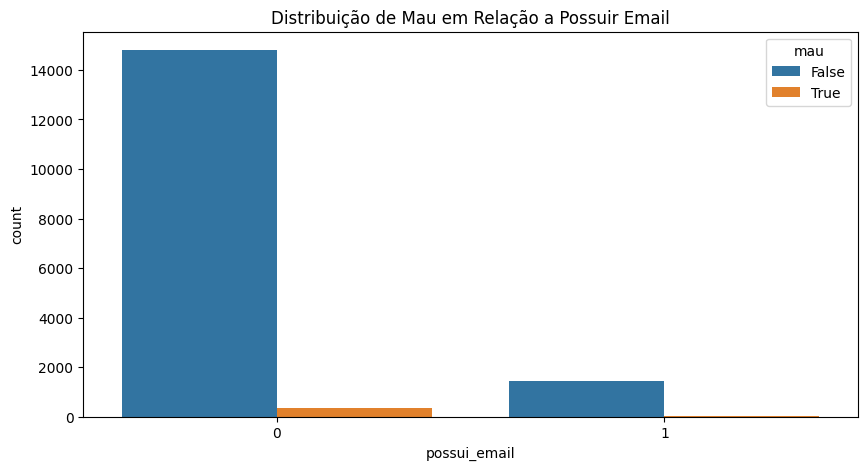

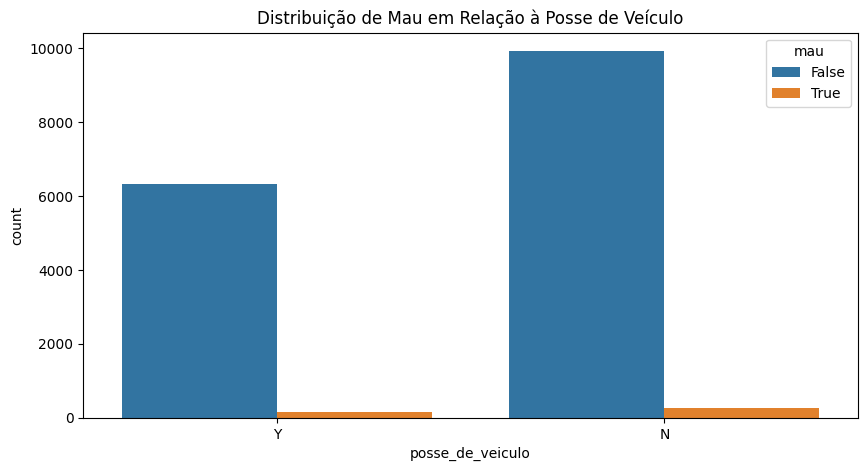

In [12]:
# Gráfico de barras empilhadas para 'possui_email' e 'mau'
plt.figure(figsize=(10, 5))
sns.countplot(x='possui_email', hue='mau', data=df)
plt.title('Distribuição de Mau em Relação a Possuir Email')
plt.show()

# Gráfico de barras empilhadas para 'posse_de_veiculo' e 'mau'
plt.figure(figsize=(10, 5))
sns.countplot(x='posse_de_veiculo', hue='mau', data=df)
plt.title('Distribuição de Mau em Relação à Posse de Veículo')
plt.show()

Ao analisar a relação entre as variáveis ***possui_email*** e ***posse_de_veiculo*** com a variável resposta ***mau***, podemos observar algumas diferenças significativas entre elas.

**Possui Email**: A distribuição de mau em relação à variável *possui_email* mostra algumas variações, mas não há uma diferença muito clara ou consistente entre os grupos. Isso indica que a presença ou ausência de um email pode não ser um fator fortemente associado ao risco de inadimplência.

**Posse de Veículo**: Por outro lado, a análise da variável *posse_de_veiculo* revela uma separação mais clara na distribuição de *mau*. Indivíduos que possuem um veículo parecem ter uma probabilidade significativamente diferente de apresentar inadimplência (*mau* = 1) em comparação aos que não possuem um veículo. Essa distinção sugere que a posse de um veículo pode estar mais fortemente associada ao baixo risco de inadimplência, tornando essa variável mais poderosa na previsão de *mau*.

Em resumo, com base na tabela cruzada e nos gráficos, parece que a variável *posse_de_veiculo* oferece uma indicação mais forte da probabilidade de inadimplência do que a variável *possui_email*. Portanto, ela pode ser considerada a mais poderosa das duas na predição do risco de *mau* = 1.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [13]:
dados.to_csv('demo01_atualizada.csv', index=False)

print("Base de dados salva como 'demo01_atualizada.csv'.")

Base de dados salva como 'demo01_atualizada.csv'.
